<a href="https://colab.research.google.com/github/Eyoel-gebre/IMDB-movie-review-Binary-classifier/blob/main/imdb_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib as pl
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers



In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
            num_words=10000)

In [9]:
#encodes int sequences using mulit-hot encoding
def vectorizer(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for i, sequence in enumerate(sequences): 
    for j in sequence:
      results[i, j] = 1. 
  return results

#traind = vectorizer(train_data)
#testd = vectorizer(test_data)

In [3]:
#encodes labels
trainl = np.asarray(train_labels).astype("float32")
testl = np.asarray(test_labels).astype("float32")


In [5]:
#can be used for decoding
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
#decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [5]:
#creates the model architecture

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])


In [6]:
#configures the loss function, optimizer, and monotired metric
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [7]:
#setting aside data for validations set

x_val = traind[:10000]
partial_x_train = traind[10000:]
y_val = trainl[:10000]
partial_y_train = trainl[10000:]

In [8]:
#trains the model in batch sizes of 512 for 
ep = 10
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=ep,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/10
30/30 [==============================] - 3s 56ms/step - loss: 0.5052 - accuracy: 0.7886 - val_loss: 0.3763 - val_accuracy: 0.8731
Epoch 2/10
30/30 [==============================] - 1s 38ms/step - loss: 0.2974 - accuracy: 0.9044 - val_loss: 0.3371 - val_accuracy: 0.8638
Epoch 3/10
30/30 [==============================] - 1s 37ms/step - loss: 0.2224 - accuracy: 0.9267 - val_loss: 0.2796 - val_accuracy: 0.8909
Epoch 4/10
30/30 [==============================] - 1s 37ms/step - loss: 0.1762 - accuracy: 0.9449 - val_loss: 0.2952 - val_accuracy: 0.8831
Epoch 5/10
30/30 [==============================] - 1s 37ms/step - loss: 0.1450 - accuracy: 0.9539 - val_loss: 0.2799 - val_accuracy: 0.8880
Epoch 6/10
30/30 [==============================] - 1s 37ms/step - loss: 0.1217 - accuracy: 0.9613 - val_loss: 0.2948 - val_accuracy: 0.8868
Epoch 7/10
30/30 [==============================] - 1s 38ms/step - loss: 0.1025 - accuracy: 0.9693 - val_loss: 0.3066 - val_accuracy: 0.8832
Epoch 8/10
30

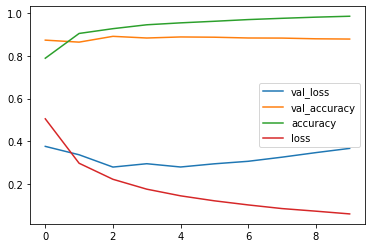

In [9]:
pl.pyplot.plot(range(ep), history.history["val_loss"], label="val_loss")
pl.pyplot.plot(range(ep), history.history["val_accuracy"], label='val_accuracy')
pl.pyplot.plot(range(ep), history.history["accuracy"], label='accuracy')
pl.pyplot.plot(range(ep), history.history["loss"], label='loss')
pl.pyplot.legend(loc='best')
pl.pyplot.show()

In [10]:
results = model.evaluate(testd, testl)
print(results)

782/782 [==============================] - 2s 3ms/step - loss: 0.3983 - accuracy: 0.8663
[0.3983391523361206, 0.866320013999939]


this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert edged is an amazing actor and now the same being director edged father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for edged and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also edged to the two little boy's that played the edged of norman and paul they were just brilliant children are often left out of the edged list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h